In [152]:
import numpy as np

In [153]:
import pandas as pd

In [154]:
import seaborn as sns

In [155]:
import matplotlib.pyplot as plt

In [156]:
import math

In [157]:
%matplotlib inline

In [158]:
titanic_data = pd.read_csv(r"C:\Users\sonu\Desktop\titanic dataset.csv")
titanic_data.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [159]:
print("# of passengers in original data:" + str(len(titanic_data.index)))

# of passengers in original data:418


<Axes: xlabel='Survived', ylabel='count'>

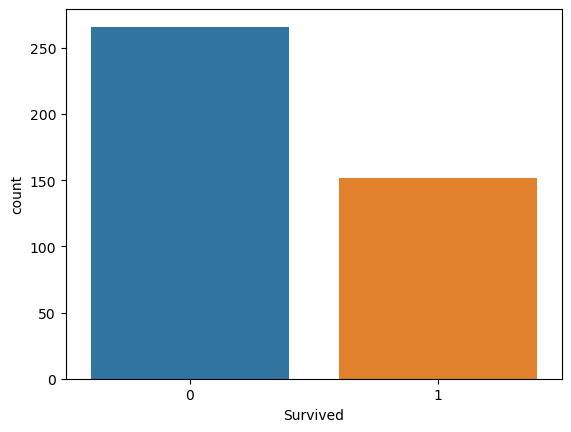

In [160]:
sns.countplot(x="Survived",data = titanic_data)

In [161]:
# here 0 represents the data that the passengers is not survived, or 1 represent the passenger who survived

In [162]:
# now let us check the survived with thier sex

<Axes: xlabel='Survived', ylabel='count'>

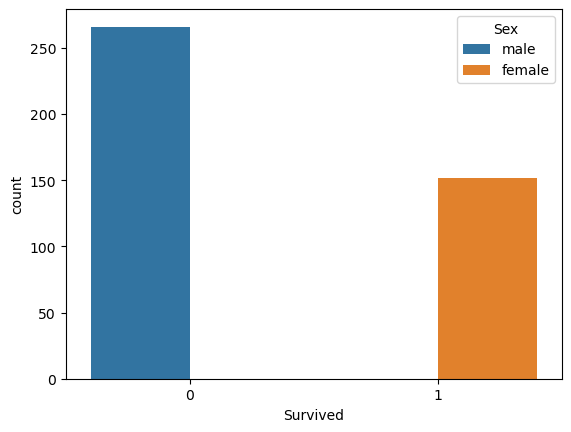

In [163]:
sns.countplot(x="Survived", hue="Sex", data=titanic_data)

<Axes: xlabel='Survived', ylabel='count'>

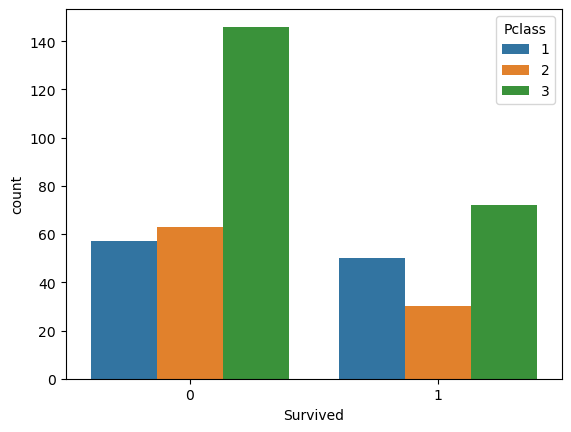

In [164]:
sns.countplot(x="Survived", hue="Pclass", data=titanic_data)

<Axes: ylabel='Frequency'>

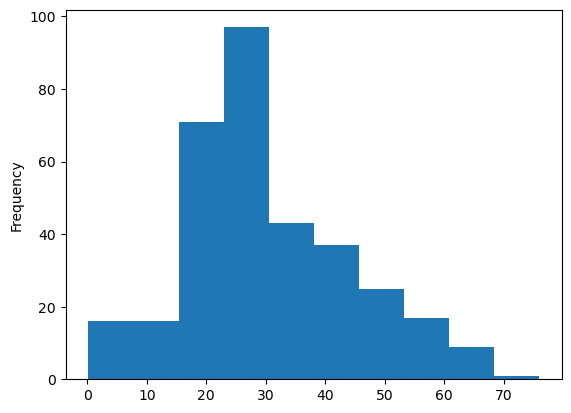

In [165]:
titanic_data["Age"].plot.hist()

<Axes: ylabel='Frequency'>

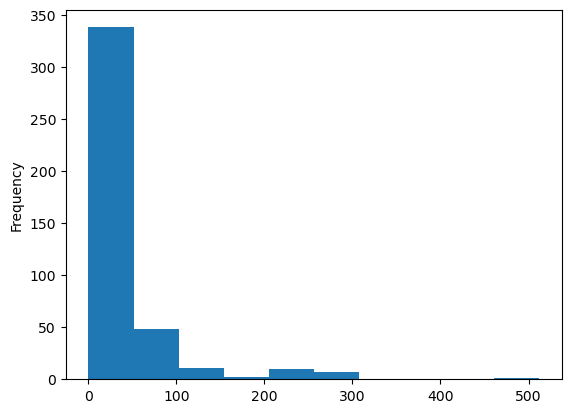

In [166]:
titanic_data["Fare"].plot.hist()

In [167]:
#here x interval is the range of 100 lets make them small and for this what we can do we add bins = 20 and also we fixed the figure of size 

<Axes: ylabel='Frequency'>

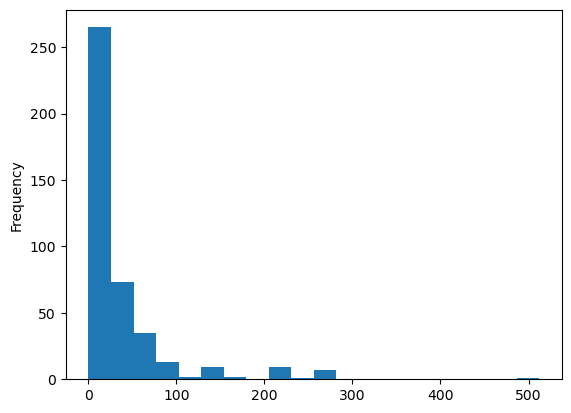

In [168]:
titanic_data["Fare"].plot.hist(bins=20)

In [169]:
#bins discretizes the numerical data into categorical data

<Axes: xlabel='SibSp', ylabel='count'>

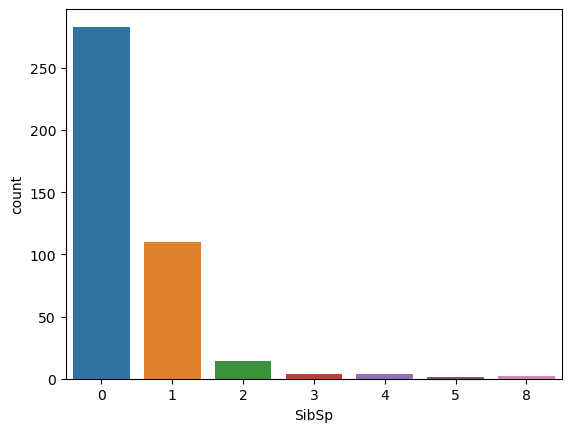

In [170]:
sns.countplot(x="SibSp",data=titanic_data)

In [171]:
titanic_data.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,True,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,True,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
413,False,False,False,False,False,True,False,False,False,False,True,False
414,False,False,False,False,False,False,False,False,False,False,False,False
415,False,False,False,False,False,False,False,False,False,False,True,False
416,False,False,False,False,False,True,False,False,False,False,True,False


In [172]:
# this is very hard for us to recognize true value i.e is null value is present in this data 

In [173]:
#so what we can do we sum the false values and true values

In [174]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [175]:
# in cabin there is 327 and in age there is 86 null value are there for easily visualization lets use heatmap

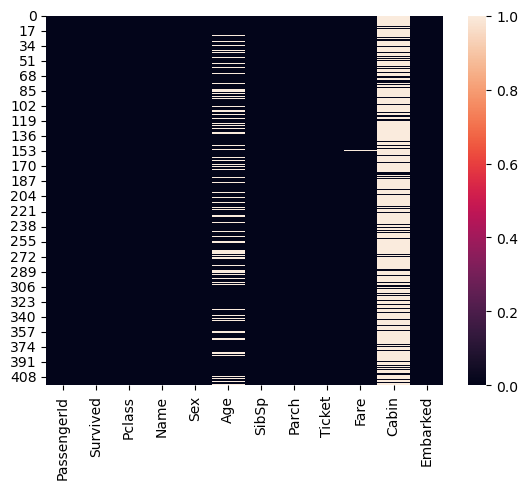

In [176]:
sns.heatmap(titanic_data.isnull())
plt.show()

In [177]:
# here age and cabin shows the null values

In [178]:
# now we draw a boxplot to impute the true value by thier average value

<Axes: xlabel='Pclass', ylabel='Age'>

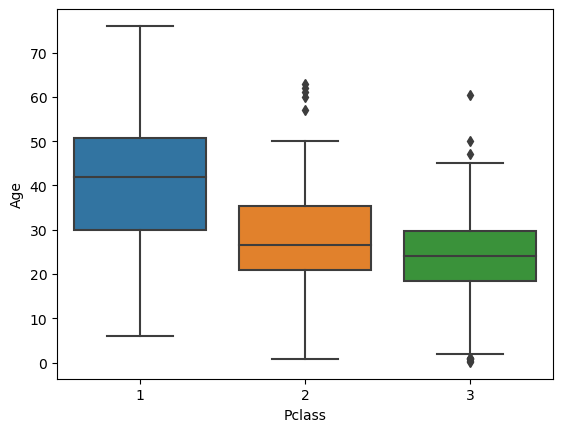

In [179]:
sns.boxplot(x="Pclass",y="Age",data=titanic_data)

In [180]:
#we want to apply data wrangling only on first 10 datasets

In [181]:
titanic_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


In [182]:
#here survived is our predicted value and rest of columns is an our explanatory variable
#when we see in cabin there is maximum null values

In [183]:
titanic_data.drop("Cabin", axis=1, inplace=True)

In [184]:
titanic_data.head(15)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
5,897,0,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,S
6,898,1,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,Q
7,899,0,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,S
8,900,1,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,C
9,901,0,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,S


In [185]:
# now there is no cabin 

In [186]:
titanic_data.dropna(inplace=True)

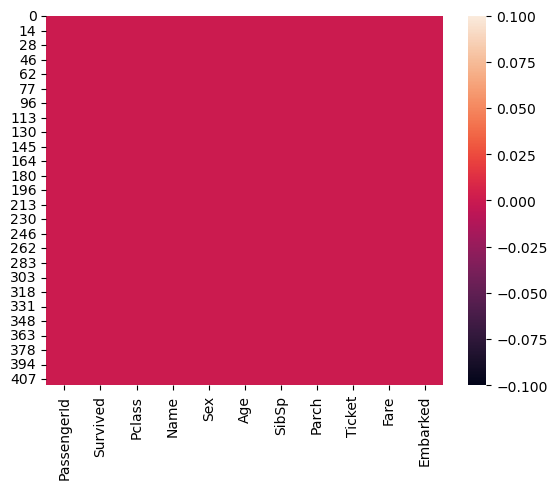

In [187]:
sns.heatmap(titanic_data.isnull())
plt.show()

In [188]:
titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [189]:
#since there is no value
# in sex there is a string so we convert this string value in no.s 

In [190]:
pd.get_dummies(titanic_data["Sex"])

,female,male
0,False,True
1,True,False
2,False,True
3,False,True
4,True,False
...,...,...
409,True,False
411,True,False
412,True,False
414,True,False


In [191]:
# in this either it is male or female so we dropout the first column

In [192]:
sex =pd.get_dummies(titanic_data["Sex"],drop_first=True)
sex.head(5)

,male
0,True
1,False
2,True
3,True
4,False


In [193]:
# in embark there is a string value lets take a dummy variable bcz logistic regression is only apply on no.s

In [194]:
embark=pd.get_dummies(titanic_data["Embarked"])
embark.head(5)

,C,Q,S
0,False,True,False
1,False,False,True
2,False,True,False
3,False,False,True
4,False,False,True


In [195]:
#again we see when Q is true then C and S is false and when C is true then Q and S is false we again dropout one columns 

In [196]:
embark=pd.get_dummies(titanic_data["Embarked"],drop_first=True)
embark.head(5)

,Q,S
0,True,False
1,False,True
2,True,False
3,False,True
4,False,True


In [197]:
pcl=pd.get_dummies(titanic_data["Pclass"],drop_first=True)
pcl.head(5)

,2,3
0,False,True
1,False,True
2,True,False
3,False,True
4,False,True


In [198]:
#now we concatenate all these data into a single datasets

In [199]:
titanic_data=pd.concat([titanic_data,sex,embark,pcl],axis=1)

In [200]:
titanic_data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q,True,True,False,False,True
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S,False,False,True,False,True
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q,True,True,False,True,False
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S,True,False,True,False,True
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S,False,False,True,False,True


In [201]:
titanic_data.drop(['Sex','PassengerId','Name','Embarked','Ticket'],axis=1,inplace=True)

In [202]:
titanic_data.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,3,34.5,0,0,7.8292,True,True,False,False,True
1,1,3,47.0,1,0,7.0000,False,False,True,False,True
2,0,2,62.0,0,0,9.6875,True,True,False,True,False
3,0,3,27.0,0,0,8.6625,True,False,True,False,True
4,1,3,22.0,1,1,12.2875,False,False,True,False,True


In [203]:
#this is our final datasets

# data train and test

In [205]:
X = titanic_data.iloc[:,[3,4]].values
y = titanic_data.iloc[:,1]

In [206]:
from sklearn.model_selection import train_test_split

In [208]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [209]:
from sklearn.preprocessing import StandardScaler

In [210]:
sc = StandardScaler()

In [211]:
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [212]:
from sklearn.linear_model import LogisticRegression

In [213]:
classifier = LogisticRegression(random_state = 0)

In [214]:
classifier.fit(X_train, y_train)

LogisticRegression(random_state=0)

In [215]:
y_pred = classifier.predict(X_test)

In [218]:
from sklearn.metrics import accuracy_score

In [219]:
accuracy_score(y_test, y_pred)

0.40963855421686746

## Accuracy score in %

In [220]:
accuracy_score(y_test, y_pred)*100

40.963855421686745